# Task3

### Predicting product rating from review text

#### 1- Start by inspecting the dataset. You will notice that the dataset is not balanced. Display the count of reviews with overall rating =1 ,2...5.

In [6]:
import pandas as pd

df = pd.read_json('reviews_Digital_Music_5.json', lines=True)
df

ValueError: Expected object or value

In [5]:
df.groupby('overall').count()['helpful']


NameError: name 'df' is not defined

#### 2- To train on a balanced dataset, select 2500 reviews for each of the overall ratings (2500 reviews with overall rating 1, 2500 reviews with overall rating 2, ... etc).

In [3]:
grouped = df.groupby('overall')
trimmed = pd.concat([g[1][0:2500] for g in list(grouped)[:5]])
trimmed #12500 rows × 9 columns

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
30,B0000000ZW,"[2, 9]",1,"In high school ""Stroke You Up"" was the jam, so...","04 28, 2006",A1X93ES4DITTWK,Blueberry Muffin,Wack in '94. . .Still Wack in `06,1146182400
86,B00000016W,"[4, 29]",1,I never understood what's the BIG deal behind ...,"08 29, 2005",A22N9H8V0RYQR3,A fair and Balanced Rater,Overrated HYPE,1125273600
94,B00000016W,"[19, 24]",1,It's now very well known that the labelling on...,"04 29, 2009",A33L1SEOXFGL44,Ashra,Not FROM THE ORIGINAL MASTERS!,1240963200
95,B00000016W,"[18, 73]",1,I am very disapointed! After looking for this ...,"11 28, 2003",AH1KJ45IQTM4T,Benjamin,Masterpiece?,1069977600
167,B00000016W,"[13, 65]",1,I love the Beach Boys as much as anyone. Let ...,"03 30, 2004",A1N643TZ48RPG7,Leonard Snerdley,More like the &quot;Mope Boys&quot;,1080604800
382,B0000004VW,"[3, 17]",1,As a child and young adult when I tended to be...,"11 19, 2007",AKNSC7IXWEYLA,mianfei,A dated childhood memory par excellence,1195430400
427,B0000004YH,"[2, 17]",1,The commercial failure of KRS1s didactic venom...,"07 31, 2002",A1LQIGGUB7R6JS,"The Orange Duke ""orangeduke""",Stick To 'Ghetto Music',1028073600
690,B00000053X,"[2, 8]",1,"Before I get any hate mail, I would like to st...","01 7, 2002",AYJNY01NFTVX3,"Janet Morris ""fuzzypinkslippers""",This CD doesn't contain much talent...,1010361600
695,B00000053X,"[5, 17]",1,It's amazing how these guys keep fooling peopl...,"04 24, 2000",A331OF34UX4Y1K,"M. Fonseca ""carmarthen""",WOW ! WHAT A BAD ALBUM!,956534400
696,B00000053X,"[0, 1]",1,Talent-Less in every sense of the word.The mus...,"04 24, 2000",A9Q28YTLYREO7,"mistermaxxx08 ""mistermaxxx08""",Very Flat,956534400


#### 4. As always, split your data into training, testing and validation. I recommend using early stopping as a regularization approach here.

In [4]:
from sklearn.model_selection import train_test_split

X = trimmed['reviewText'].values
y = trimmed['overall'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

#### 3. As discussed in lecture, review words will have to be transformed to numeric features before they are fed to a neural network.

In [5]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=40000)
X_train_transformed = tfidf_vectorizer.fit_transform(X_train)
X_test_transformed = tfidf_vectorizer.transform(X_test)

#### 6. Train Network 

##### Define Classifier

In [6]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(validation_fraction=0.25, early_stopping=True)

In [ ]:
clf.fit(X_train_transformed, y_train)

##### Parameter Tuning

In [7]:
from sklearn.model_selection import GridSearchCV

In [13]:
learning_rates = dict([('learning_rate_init', [0.001, 0.01, 0.1, 0.2, 0.5])])
gs_lr = GridSearchCV(clf, param_grid=learning_rates, verbose=3, n_jobs=-1)
gs_lr.fit(X_train_transformed, y_train)
print(gs_lr.best_params_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] learning_rate_init=0.001 ........................................
[CV]  learning_rate_init=0.001, score=0.6085131894484412, total=  26.7s
[CV] learning_rate_init=0.001 ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   26.7s remaining:    0.0s


[CV]  learning_rate_init=0.001, score=0.5988598859885989, total=  35.0s
[CV] learning_rate_init=0.001 ........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.0min remaining:    0.0s


[CV]  learning_rate_init=0.001, score=0.5899129390573401, total=  26.4s
[CV] learning_rate_init=0.01 .........................................
[CV]  learning_rate_init=0.01, score=0.6097122302158273, total=  14.3s
[CV] learning_rate_init=0.01 .........................................
[CV]  learning_rate_init=0.01, score=0.5841584158415841, total=  14.3s
[CV] learning_rate_init=0.01 .........................................
[CV]  learning_rate_init=0.01, score=0.5779045331732212, total=  14.8s
[CV] learning_rate_init=0.1 ..........................................
[CV] . learning_rate_init=0.1, score=0.5767386091127098, total=  11.5s
[CV] learning_rate_init=0.1 ..........................................
[CV] . learning_rate_init=0.1, score=0.5760576057605761, total=  11.4s
[CV] learning_rate_init=0.1 ..........................................
[CV] . learning_rate_init=0.1, score=0.5610927649354548, total=  14.8s
[CV] learning_rate_init=0.2 ..........................................
[CV] 

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  5.1min finished


{'learning_rate_init': 0.001}


In [20]:
hidden_layers = dict([('hidden_layer_sizes', [(128,), (512,), (1024,), (128, 128), (128, 128, 128)])])
gs_layers = GridSearchCV(clf, param_grid=hidden_layers, verbose=3, n_jobs=-1)
gs_layers.fit(X_train_transformed, y_train)
print(gs_layers.best_params_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] hidden_layer_sizes=(128,) .......................................
[CV]  hidden_layer_sizes=(128,), score=0.6022182254196643, total=  42.1s
[CV] hidden_layer_sizes=(128,) .......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   42.2s remaining:    0.0s


[CV]  hidden_layer_sizes=(128,), score=0.6033603360336034, total=  47.6s
[CV] hidden_layer_sizes=(128,) .......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.5min remaining:    0.0s


[CV]  hidden_layer_sizes=(128,), score=0.580906634644251, total=  55.0s
[CV] hidden_layer_sizes=(512,) .......................................
[CV]  hidden_layer_sizes=(512,), score=0.6040167865707434, total= 2.5min
[CV] hidden_layer_sizes=(512,) .......................................
[CV]  hidden_layer_sizes=(512,), score=0.6075607560756076, total= 2.5min
[CV] hidden_layer_sizes=(512,) .......................................
[CV]  hidden_layer_sizes=(512,), score=0.5797057940558391, total= 2.6min
[CV] hidden_layer_sizes=(1024,) ......................................
[CV]  hidden_layer_sizes=(1024,), score=0.6085131894484412, total= 4.2min
[CV] hidden_layer_sizes=(1024,) ......................................
[CV]  hidden_layer_sizes=(1024,), score=0.5991599159915991, total= 5.0min
[CV] hidden_layer_sizes=(1024,) ......................................
[CV]  hidden_layer_sizes=(1024,), score=0.5866106274392074, total= 4.4min
[CV] hidden_layer_sizes=(128, 128) ..........................

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 28.1min finished


{'hidden_layer_sizes': (1024,)}


In [8]:
batch_sizes = dict([('batch_size', [32, 64, 256, 512])])
gs_batch = GridSearchCV(clf, param_grid=batch_sizes, verbose=3, n_jobs=-1)
gs_batch.fit(X_train_transformed, y_train)
print(gs_batch.best_params_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] batch_size=32 ...................................................
[CV] .......... batch_size=32, score=0.6070143884892086, total= 1.7min
[CV] batch_size=32 ...................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.7min remaining:    0.0s


[CV] .......... batch_size=32, score=0.5994599459945995, total= 1.4min
[CV] batch_size=32 ...................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  3.0min remaining:    0.0s


[CV] .......... batch_size=32, score=0.5890123086160313, total= 1.4min
[CV] batch_size=64 ...................................................
[CV] .......... batch_size=64, score=0.6031175059952039, total=  42.9s
[CV] batch_size=64 ...................................................
[CV] .......... batch_size=64, score=0.6084608460846085, total= 1.0min
[CV] batch_size=64 ...................................................
[CV] .......... batch_size=64, score=0.5866106274392074, total= 1.1min
[CV] batch_size=256 ..................................................
[CV] .......... batch_size=256, score=0.612410071942446, total=  29.2s
[CV] batch_size=256 ..................................................
[CV] ......... batch_size=256, score=0.6057605760576058, total=  24.9s
[CV] batch_size=256 ..................................................
[CV] ......... batch_size=256, score=0.5926148303812668, total=  24.7s
[CV] batch_size=512 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  9.5min finished


{'batch_size': 256}


In [16]:
alphas = dict([('alpha', [0.0001, 0.001, 0.01, 0.1])])
gs_alpha = GridSearchCV(clf, param_grid=alphas, verbose=3, n_jobs=-1)
gs_alpha.fit(X_train_transformed, y_train)
print(gs_alpha.best_params_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] alpha=0.0001 ....................................................
[CV] ........... alpha=0.0001, score=0.6019184652278178, total=  23.2s
[CV] alpha=0.0001 ....................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   23.3s remaining:    0.0s


[CV] ........... alpha=0.0001, score=0.5988598859885989, total=  32.8s
[CV] alpha=0.0001 ....................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   56.2s remaining:    0.0s


[CV] ............ alpha=0.0001, score=0.580306214350045, total=  26.0s
[CV] alpha=0.001 .....................................................
[CV] ............ alpha=0.001, score=0.6106115107913669, total=  27.6s
[CV] alpha=0.001 .....................................................
[CV] ............ alpha=0.001, score=0.5952595259525952, total=  36.7s
[CV] alpha=0.001 .....................................................
[CV] ............ alpha=0.001, score=0.5815070549384569, total=  25.0s
[CV] alpha=0.01 ......................................................
[CV] ............... alpha=0.01, score=0.60431654676259, total=  29.9s
[CV] alpha=0.01 ......................................................
[CV] ............. alpha=0.01, score=0.6027602760276027, total=  24.5s
[CV] alpha=0.01 ......................................................
[CV] .............. alpha=0.01, score=0.580306214350045, total=  31.8s
[CV] alpha=0.1 .......................................................
[CV] .

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  5.9min finished


{'alpha': 0.001}


In [30]:
from helpers import results_parser
import numpy as np

res_batch = results_parser(gs_batch)
res_batch = np.array(res_batch)

res_alpha = results_parser(gs_alpha)
res_alpha = np.array(res_alpha)

res_layers = results_parser(gs_layers)
res_layers = np.array(res_layers)

res_lr = results_parser(gs_lr)
res_lr = np.array(res_lr)

print('Best Batch Size:', res_batch[0])
print('Worst Batch Size:', res_batch[-1])
print()

print('Best Hidden Layers:', res_layers[0])
print('WorstHidden Layers:', res_layers[-1])
print()

print('Best Learning Rate:', res_lr[0])
print('Worst Learning Rate:', res_lr[-1])
print()

print('Best L2 Value:', res_alpha[0])
print('Worst L2 Value:', res_alpha[-1])
print()

Best Batch Size: ['1' '0.6036' 'batch_size=256']
Worst Batch Size: ['4' '0.5904' 'batch_size=512']

Best Hidden Layers: ['1' '0.5981' 'hidden_layer_sizes=(1024,)']
WorstHidden Layers: ['5' '0.5844' 'hidden_layer_sizes=(128, 128, 128)']

Best Learning Rate: ['1' '0.5991' 'learning_rate_init=0.001']
Worst Learning Rate: ['5' '0.398' 'learning_rate_init=0.5']

Best L2 Value: ['1' '0.5958' 'alpha=0.001']
Worst L2 Value: ['4' '0.5791' 'alpha=0.1']



In [25]:
clf_best = MLPClassifier(
    validation_fraction=0.25,
    early_stopping=True,
    batch_size=256,
    hidden_layer_sizes=(1024,),
    learning_rate_init=0.001,
    alpha=0.001)

In [26]:
clf_best.fit(X_train_transformed, y_train)

MLPClassifier(activation='relu', alpha=0.001, batch_size=256, beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(1024,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.25,
       verbose=False, warm_start=False)

In [27]:
y_pred = clf_best.predict(X_test_transformed)

#### 5. Use the appropriate scoring metric for evaluating your neural networks. Justify your selection.

In [50]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred, y_test)
print('Accuracy: {}%'.format(int(accuracy*100)))

Accuracy: 61%


Accuracy was chosen as the scoring metric because of the classification nature of the problem.

#### 7. plot the normalized confusion matrix for the best performing architecture. 

Normalized confusion matrix
[[0.7  0.2  0.06 0.02 0.01]
 [0.25 0.47 0.21 0.05 0.02]
 [0.03 0.16 0.52 0.22 0.06]
 [0.03 0.04 0.2  0.57 0.17]
 [0.03 0.01 0.06 0.13 0.78]]


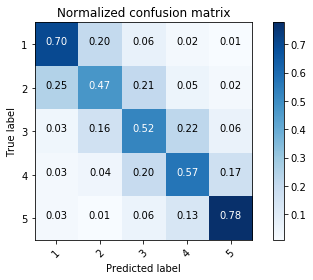

In [45]:
from sklearn.metrics import confusion_matrix
# from helpers import plot_confusion_matrix
import matplotlib.pyplot as plt

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=set(y_test), normalize=True,
                      title='Normalized confusion matrix')
plt.show()

#### Comment on the ratios of misclassified instances for each class. 

For classes 1 & 5, the missclassified instances are only 22-30%, while in classes 2,3 & 4, the missclassified instances are 43-53%. This shows that the extreme classes are easier to classify. This is because you are most likely to misclassify a class into any one of the two adjacent classes, but for classes 1 & 5 there is only one such class. 

#### 8. What is the activation function used at the output layer?

In [51]:
print(clf_best.out_activation_)

softmax


#### Did you have to select this function yourself? How does SKLearn determine it?

No. Sklearn uses the sigmoid function for binary classification. But for n-class classification, which is the case here, it uses the softmax function. In the case of regression, it uses the identity function, meaning the output remains as is.
This can be found in this documentation http://scikit-learn.org/stable/modules/neural_networks_supervised.html#mathematical-formulation.